# Animal Crossing Clothes Colors and Bell Values

## Ryan Tran, Adam Tschida, Dara Zwemer, Colby Luttrell

### Importing Files

In [1]:
# Import appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn.preprocessing import LabelEncoder # For Modeling
lc = LabelEncoder()
import statsmodels.api as sm

In [2]:
# THE DATASET IS FROM KAGGLE: https://www.kaggle.com/jessicali9530/animal-crossing-new-horizons-nookplaza-dataset

# Import tops (shirts) dataset
top = pd.read_csv('tops.csv')

# Import bottoms (pants) dataset
bottom = pd.read_csv('bottoms.csv')

# Import headwear (hats and wigs) dataset
hat = pd.read_csv('headwear.csv')

# Import shoes dataset
shoe = pd.read_csv('shoes.csv')

In [3]:
# take a quick look at the tops dataset
top.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1121 non-null   object 
 1   Variation              1059 non-null   object 
 2   DIY                    1121 non-null   object 
 3   Buy                    1121 non-null   object 
 4   Sell                   1121 non-null   int64  
 5   Color 1                1121 non-null   object 
 6   Color 2                1121 non-null   object 
 7   Size                   1121 non-null   object 
 8   Miles Price            5 non-null      float64
 9   Source                 1121 non-null   object 
 10  Source Notes           1043 non-null   object 
 11  Seasonal Availability  1121 non-null   object 
 12  Mannequin Piece        1121 non-null   object 
 13  Version                1121 non-null   object 
 14  Style                  1121 non-null   object 
 15  Labe

In [4]:
# take a quick look at the bottoms dataset
bottom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name                   726 non-null    object
 1   Variation              726 non-null    object
 2   DIY                    726 non-null    object
 3   Buy                    726 non-null    object
 4   Sell                   726 non-null    int64 
 5   Color 1                726 non-null    object
 6   Color 2                726 non-null    object
 7   Size                   726 non-null    object
 8   Source                 726 non-null    object
 9   Source Notes           709 non-null    object
 10  Seasonal Availability  726 non-null    object
 11  Mannequin Piece        726 non-null    object
 12  Version                726 non-null    object
 13  Style                  726 non-null    object
 14  Label Themes           726 non-null    object
 15  Villager Equippable    

In [5]:
# take a quick look at the headwear dataset
hat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   698 non-null    object 
 1   Variation              693 non-null    object 
 2   DIY                    698 non-null    object 
 3   Buy                    698 non-null    object 
 4   Sell                   698 non-null    int64  
 5   Color 1                698 non-null    object 
 6   Color 2                698 non-null    object 
 7   Size                   698 non-null    object 
 8   Miles Price            2 non-null      float64
 9   Source                 698 non-null    object 
 10  Source Notes           585 non-null    object 
 11  Seasonal Availability  698 non-null    object 
 12  Mannequin Piece        698 non-null    object 
 13  Version                698 non-null    object 
 14  Style                  698 non-null    object 
 15  Label 

In [6]:
# take a quick look at the shoes dataset
shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   454 non-null    object 
 1   Variation              452 non-null    object 
 2   DIY                    454 non-null    object 
 3   Buy                    454 non-null    object 
 4   Sell                   454 non-null    int64  
 5   Color 1                454 non-null    object 
 6   Color 2                454 non-null    object 
 7   Size                   454 non-null    object 
 8   Miles Price            1 non-null      float64
 9   Source                 454 non-null    object 
 10  Source Notes           312 non-null    object 
 11  Seasonal Availability  454 non-null    object 
 12  Mannequin Piece        454 non-null    object 
 13  Version                454 non-null    object 
 14  Style                  454 non-null    object 
 15  Label 

### Feature Engineering: Add Variable to Indicate Type of Clothing

In [8]:
# Use a for loop to differentiate the kinds of hats/head items in the dataset
Category = []
ClothDict = {'HeadCap': 'Hat', 'HeadFace': 'Partial Mask', 'HeadFullFace': 'Full Mask',
            'Headgear': 'Head Gear', 'HeadHair': 'Head Ornament'}

for row in hat['Type']:
    found = 0
    for x in ClothDict:
        if x in row:
            Category.append(ClothDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
hat['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
hat['Item Category'].value_counts()


Hat              396
Head Gear        145
Head Ornament     97
Full Mask         49
Partial Mask      11
Name: Item Category, dtype: int64

In [9]:
# Use a for loop to differentiate the types of shoes present in the data
Category = []
ShoeDict = {'AccessoryGlass': 'Glass Slipper', 'ShoesHigh': 'Shoe High Cut', 'ShoesKnee': 'Shoe Knee High',
           'ShoesLow': 'Shoe Low Cut', 'ShoesSandle': 'Shoe Sandle'}

for row in shoe['Filename']:
    found = 0
    for x in ShoeDict:
        if x in row:
            Category.append(ShoeDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
shoe['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
shoe['Item Category'].value_counts()

Shoe Low Cut      176
Other             116
Shoe High Cut      90
Shoe Knee High     71
Glass Slipper       1
Name: Item Category, dtype: int64

In [10]:
# Use a for loop to differentiate the types of pants present in the data
Category = []
BotDict = {'BottomsTexPantsHalf': 'Bottom Pants Half', 'BottomsTexPantsHot': 'Bottom Pants Hot',
          'BottomsTexPantsNormal': 'Bottom Pants Normal', 'BottomsTexPantsWide': 'Bottom Pants Wide',
          'BottomsTexSkirtAline': 'Bottom Skirt Aline', 'BottomsTexSkirtBox': 'Bottom Skirt Box',
          'BottomsTexSkirtLong': 'Bottom Skirt Long'}

for row in bottom['Filename']:
    found = 0
    for x in BotDict:
        if x in row:
            Category.append(BotDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
bottom['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
bottom['Item Category'].value_counts()

Bottom Pants Normal    173
Bottom Pants Wide      126
Bottom Skirt Long      110
Bottom Skirt Box        96
Bottom Pants Half       87
Bottom Skirt Aline      74
Bottom Pants Hot        60
Name: Item Category, dtype: int64

In [11]:
# Use a for loop to differentiate the types of tops/shirts present in the data
Category = []
TopDict = {'TopsTexTopCoat': 'Top Coat', 'TopsTexTopOuter': 'Top Outer',
          'TopsTexTopPuff': 'Top Puff', 'TopsTexTopTshirts': 'Top Tshirt',
          'TopsTexTopYshirts': 'Top Yshirt'} # Note: Yshirts indicate shirts with a layered jacket/vest

for row in top['Filename']:
    found = 0
    for x in TopDict:
        if x in row:
            Category.append(TopDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
top['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
top['Item Category'].value_counts()

Top Tshirt    335
Top Yshirt    331
Top Coat      253
Top Outer     190
Top Puff       12
Name: Item Category, dtype: int64

### Merging the Dataset

In [12]:
# Use a for loop to differentiate the kinds of hats/head items in the dataset
Category = []
ClothDict = {'HeadCap': 'Hat', 'HeadFace': 'Partial Mask', 'HeadFullFace': 'Full Mask',
            'Headgear': 'Head Gear', 'HeadHair': 'Head Ornament'}

for row in hat['Type']:
    found = 0
    for x in ClothDict:
        if x in row:
            Category.append(ClothDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
hat['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
hat['Item Category'].value_counts()


Hat              396
Head Gear        145
Head Ornament     97
Full Mask         49
Partial Mask      11
Name: Item Category, dtype: int64

In [13]:
# Use a for loop to differentiate the types of shoes present in the data
Category = []
ShoeDict = {'AccessoryGlass': 'Glass Slipper', 'ShoesHigh': 'Shoe High Cut', 'ShoesKnee': 'Shoe Knee High',
           'ShoesLow': 'Shoe Low Cut', 'ShoesSandle': 'Shoe Sandle'}

for row in shoe['Filename']:
    found = 0
    for x in ShoeDict:
        if x in row:
            Category.append(ShoeDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
shoe['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
shoe['Item Category'].value_counts()

Shoe Low Cut      176
Other             116
Shoe High Cut      90
Shoe Knee High     71
Glass Slipper       1
Name: Item Category, dtype: int64

In [14]:
# Use a for loop to differentiate the types of pants present in the data
Category = []
BotDict = {'BottomsTexPantsHalf': 'Bottom Pants Half', 'BottomsTexPantsHot': 'Bottom Pants Hot',
          'BottomsTexPantsNormal': 'Bottom Pants Normal', 'BottomsTexPantsWide': 'Bottom Pants Wide',
          'BottomsTexSkirtAline': 'Bottom Skirt Aline', 'BottomsTexSkirtBox': 'Bottom Skirt Box',
          'BottomsTexSkirtLong': 'Bottom Skirt Long'}

for row in bottom['Filename']:
    found = 0
    for x in BotDict:
        if x in row:
            Category.append(BotDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
bottom['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
bottom['Item Category'].value_counts()

Bottom Pants Normal    173
Bottom Pants Wide      126
Bottom Skirt Long      110
Bottom Skirt Box        96
Bottom Pants Half       87
Bottom Skirt Aline      74
Bottom Pants Hot        60
Name: Item Category, dtype: int64

In [15]:
# Use a for loop to differentiate the types of tops/shirts present in the data
Category = []
TopDict = {'TopsTexTopCoat': 'Top Coat', 'TopsTexTopOuter': 'Top Outer',
          'TopsTexTopPuff': 'Top Puff', 'TopsTexTopTshirts': 'Top Tshirt',
          'TopsTexTopYshirts': 'Top Yshirt'} # Note: Yshirts indicate shirts with a layered jacket/vest

for row in top['Filename']:
    found = 0
    for x in TopDict:
        if x in row:
            Category.append(TopDict[x])
            found = 1
            break # End loop early if found
    if found == 0: Category.append('Other') # Catch all in case type of clothing missed in dict

# Add list of clothing categories to main dataframe
top['Item Category'] = Category

# Confirm nothing in other and category counts seem plausible
top['Item Category'].value_counts()

Top Tshirt    335
Top Yshirt    331
Top Coat      253
Top Outer     190
Top Puff       12
Name: Item Category, dtype: int64

In [16]:
# Merge the tops and bottoms datasets together
topB = pd.merge(left=top, right=bottom, how='outer')

# Merge the hat and shoes datasets together
hatS = pd.merge(left=hat, right=shoe, how='outer')

# Merge both datasets together
allDat = pd.merge(left=topB, right=hatS, how='outer')

# Take a quick look and ensure merges have been done correctly
allDat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2999 non-null   object 
 1   Variation              2930 non-null   object 
 2   DIY                    2999 non-null   object 
 3   Buy                    2999 non-null   object 
 4   Sell                   2999 non-null   int64  
 5   Color 1                2999 non-null   object 
 6   Color 2                2999 non-null   object 
 7   Size                   2999 non-null   object 
 8   Miles Price            8 non-null      float64
 9   Source                 2999 non-null   object 
 10  Source Notes           2649 non-null   object 
 11  Seasonal Availability  2999 non-null   object 
 12  Mannequin Piece        2999 non-null   object 
 13  Version                2999 non-null   object 
 14  Style                  2999 non-null   object 
 15  Labe

### Cleaning the Data

In [17]:
# create a copy of the dataset for cleaning
cDat = allDat.copy(deep=True)

In [18]:
# Drop all items that are not for sale (NFS)
cDat.drop(cDat.index[cDat['Buy'] == "NFS"], inplace =  True)

In [19]:
# Convert Buy values (price each item costs) to numbers rather than objects
cDat['Buy'] = pd.to_numeric(cDat['Buy'])

In [20]:
# Ensure that all changes were properly applied
cDat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2855 entries, 0 to 2998
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2855 non-null   object 
 1   Variation              2798 non-null   object 
 2   DIY                    2855 non-null   object 
 3   Buy                    2855 non-null   int64  
 4   Sell                   2855 non-null   int64  
 5   Color 1                2855 non-null   object 
 6   Color 2                2855 non-null   object 
 7   Size                   2855 non-null   object 
 8   Miles Price            0 non-null      float64
 9   Source                 2855 non-null   object 
 10  Source Notes           2645 non-null   object 
 11  Seasonal Availability  2855 non-null   object 
 12  Mannequin Piece        2855 non-null   object 
 13  Version                2855 non-null   object 
 14  Style                  2855 non-null   object 
 15  Labe

In [21]:
# For seasonal analyses of tops, repeat these cleansing strategies on the "top" dataset and create a new one titled "tops"
tops = top.copy(deep=True)

In [22]:
# Drop all items that are not for sale (NFS)
tops.drop(tops.index[tops['Buy'] == "NFS"], inplace =  True)

In [23]:
# Convert Buy values (price each item costs) to numbers rather than objects
tops['Buy'] = pd.to_numeric(tops['Buy'])

In [24]:
# Ensure that all changes were properly applied
tops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1091 entries, 0 to 1120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   1091 non-null   object 
 1   Variation              1040 non-null   object 
 2   DIY                    1091 non-null   object 
 3   Buy                    1091 non-null   int64  
 4   Sell                   1091 non-null   int64  
 5   Color 1                1091 non-null   object 
 6   Color 2                1091 non-null   object 
 7   Size                   1091 non-null   object 
 8   Miles Price            0 non-null      float64
 9   Source                 1091 non-null   object 
 10  Source Notes           1040 non-null   object 
 11  Seasonal Availability  1091 non-null   object 
 12  Mannequin Piece        1091 non-null   object 
 13  Version                1091 non-null   object 
 14  Style                  1091 non-null   object 
 15  Labe

### Create a Separate Dataset with Single Item Values

In [25]:
# Create a separate dataset that is not in long format and excludes colors. First, copy the dataset
itemDat = cDat.copy(deep=True)

In [26]:
# Remove duplicate entries (but keep the first occurrence!) with Pandas
# Use identifying characteristics to identify duplicates.
itemDat.drop_duplicates(subset=["Name"], keep='first', inplace=True)

# Ensure that this removal was successful
itemDat.info()

### Citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 2991
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   636 non-null    object 
 1   Variation              579 non-null    object 
 2   DIY                    636 non-null    object 
 3   Buy                    636 non-null    int64  
 4   Sell                   636 non-null    int64  
 5   Color 1                636 non-null    object 
 6   Color 2                636 non-null    object 
 7   Size                   636 non-null    object 
 8   Miles Price            0 non-null      float64
 9   Source                 636 non-null    object 
 10  Source Notes           560 non-null    object 
 11  Seasonal Availability  636 non-null    object 
 12  Mannequin Piece        636 non-null    object 
 13  Version                636 non-null    object 
 14  Style                  636 non-null    object 
 15  Label

In [27]:
# Drop unneccessary columns - we do not need color variations, and we are not considering price in Miles
itemDat = itemDat.drop(['Variation', 'Color 1', 'Color 2', 'Miles Price'], axis = 1)

In [28]:
# Take a quick look at the dataset
itemDat.head(30)

,Name,DIY,Buy,Sell,Size,Source,Source Notes,Seasonal Availability,Mannequin Piece,Version,Style,Label Themes,Villager Equippable,Catalog,Filename,Internal ID,Unique Entry ID,Item Category,Type
0,A tee,No,560,140,1x1,Nook Shopping Catalog,NaN,All Year,No,1.0.0,Simple,everyday; comfy,Yes,For sale,TopsTexTopTshirtsHAce0,8532,7XCg953t2tGAPuzaR,Top Tshirt,NaN
1,acid-washed jacket,No,1680,420,1x1,Able Sisters,Available from Able Sisters shop only,All Year,Yes,1.0.0,Simple,everyday; outdoorsy,Yes,For sale,TopsTexTopOuterLChemical0,5289,zAiLmCwSaWADqXkRf,Top Outer,NaN
3,after-school jacket,No,1050,262,1x1,Able Sisters,Available from Able Sisters shop only,All Year,Yes,1.0.0,Cool,everyday; comfy,Yes,For sale,TopsTexTopYshirtsLGakuranopen0,4366,rAfEdHYdt5e4AGTya,Top Yshirt,NaN
10,animal-print coat,No,2320,580,1x1,Able Sisters,Available from Able Sisters shop only,Winter,Yes,1.0.0,Cute,everyday,Yes,For sale,TopsTexTopCoatLAnimal0,4465,ozg6yMkXQzsmkjPsW,Top Coat,NaN
14,animal-stripes tee,No,960,240,1x1,Able Sisters,Available from either Mable's temporary shop o...,Summer,No,1.0.0,Cool,everyday; comfy,Yes,For sale,TopsTexTopTshirtsHStripe0,8198,WTG2RBsXk5cimHsis,Top Tshirt,NaN
16,annyeong tee,No,640,160,1x1,Nook Shopping Catalog,NaN,All Year,No,1.0.0,Simple,everyday; comfy,Yes,For sale,TopsTexTopTshirtsHHellokr0,12117,mfMor9YWpsoEbPK5e,Top Tshirt,NaN
17,anorak jacket,No,1400,350,1x1,Able Sisters,Available from either Mable's temporary shop o...,All Year,No,1.0.0,Simple,everyday; outdoorsy,Yes,For sale,TopsTexTopCoatLAnorak0,4793,agpR79ZTHcuQheDdF,Top Coat,NaN
20,apron,No,840,210,1x1,Able Sisters,Available from Able Sisters shop only,All Year,No,1.0.0,Simple,everyday; work,Yes,For sale,TopsTexTopCoatHApron0,3228,LTZqXvkrNxza2nMPb,Top Coat,NaN
28,Aran-knit cardigan,No,1300,325,1x1,Able Sisters,Available from either Mable's temporary shop o...,Winter,No,1.0.0,Simple,everyday; comfy,Yes,For sale,TopsTexTopOuterLArancardigan0,3643,fJR97K7r3qHAB2TLr,Top Outer,NaN
32,Aran-knit sweater,No,1200,300,1x1,Able Sisters,Available from either Mable's temporary shop o...,Winter,No,1.0.0,Simple,everyday; comfy,Yes,For sale,TopsTexTopOuterLAran0,3633,Bk2v8mfDeJJX3khg6,Top Outer,NaN


### Initial Sample Descriptives

In [29]:
# Analyze how many clothing items are sold/acquired from each vendor
itemDat['Source'].value_counts('')

Able Sisters                    554
Nook Shopping Catalog            37
Kicks                            24
Labelle                           8
Nook Shopping Promotion           3
Wedding Season                    3
International Children's Day      2
New Year's Eve                    2
Winter Solstice Festival          1
Dodo Airlines                     1
Summer Solstice Festival          1
Name: Source, dtype: int64

In [30]:
# Analyze the exact number of items in each category
itemDat['Item Category'].value_counts('')

Top Tshirt             97
Hat                    79
Top Yshirt             70
Top Coat               59
Top Outer              47
Head Gear              32
Shoe Low Cut           30
Bottom Pants Normal    29
Bottom Pants Wide      25
Bottom Skirt Long      23
Head Ornament          17
Bottom Skirt Box       17
Bottom Pants Half      16
Shoe Knee High         16
Other                  16
Bottom Skirt Aline     16
Shoe High Cut          14
Bottom Pants Hot       13
Full Mask              11
Partial Mask            5
Top Puff                3
Glass Slipper           1
Name: Item Category, dtype: int64

In [31]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPH
# Create an array with the colors you want to use. I want to categorize these sections.
CatColors = ["#299438","#299438","#299438","#299438","#299438","#4073FF","#4073FF","#4073FF","#4073FF","#4073FF",
             "#4073FF","#4073FF", "#117864","#117864","#117864","#117864","#117864","#96C3EB","#96C3EB","#96C3EB",
             "#96C3EB","#96C3EB"]
# Green Tops, Blue Bottoms, Blue-Green Hats, Light Blue Shoes

# Set your custom color palette
sns.set_palette(sns.color_palette(CatColors))

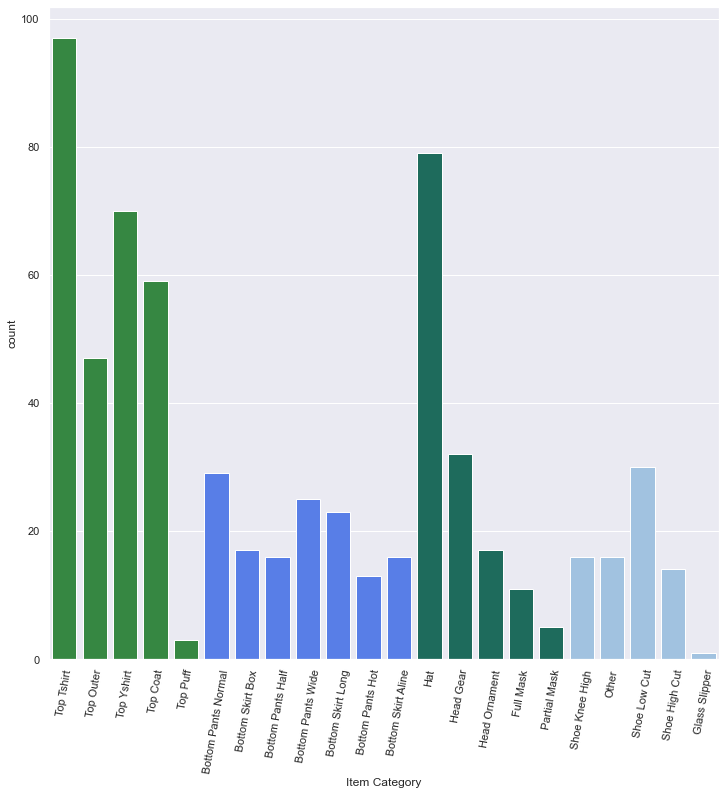

In [32]:
# How many single clothing items are in each category?
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x='Item Category', data=itemDat, palette=CatColors) # Change to item dataset

plt.xticks(rotation = 80) # set more descriptive, rotated labels

plt.show()

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html
### COLOR CITATION: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
### WHITEGRID CITATION: Dr. Scott Siepel, Data 1500

## Regression Analysis to Determine Factors Affecting Resale Value and Buy Price

* Within the game, each item has a buy price and sell price. One can buy an item for a specific price and re-sell the item for another price.
* Our initial regression goal was to determine if certain features affected whether some items held their value better than other items.
* To judge how well an item holds value, we will calculate re-sell price / buy price. This will give us the percentage of the original price one will receive if they re-sell an item. The higher the percentage, the better an item has held its value.

In [33]:
# Create variable to see how much of original cost of item is returned upon resale
cDatReg = cDat.copy()
cDatReg['Value Returned'] = cDatReg['Sell'] / cDatReg['Buy']

In [34]:
# View value counts for value returned feature
cDatReg['Value Returned'].value_counts()

0.250000    2593
0.248980      51
0.248571      44
0.249351      27
0.249451      22
0.249206      19
0.249524      18
0.249660      13
0.249655      13
0.249714      13
0.249624       8
0.249412       7
0.249780       6
0.249600       5
0.249565       4
0.249834       4
0.249677       4
0.249841       4
Name: Value Returned, dtype: int64

* It appears items have a constant resale value equal to 25% of the original cost. Since 25% appears to be a standard, ubiquitous re-sell marker, we will not run a regression for value returned. Instead, we will run a regression with Buy as our target variable. Our new question is determining if certain features have an impact on the cost of an item.
* Since Value Returned is roughly 25% for all items, we will not use Value Returned as a feature in our regression. This feature would add no unique explanatory power.
* In addition, we will not use sell as a feature in our regression. If one has the sell price, one can easily calculate the buy price as the sell price is always 25% of the buy price. Therefore, our regression would be irrelevant if sell price were included as a feature.

In [35]:
# Drop value returned from the dataset
cDatReg = cDatReg.drop(['Value Returned', 'Sell'], axis = 1)

* Before we move forward with cleaning our object datatypes for the regression, we can use the groupby function to identify patterns among buy price.
* For example, we can look at the mean buying price for each item category to see if some categories appear to have buy prices.

In [36]:
# Use groupby to see if some item categories have higher buy prices
# NOTE! - groupby code taken from stack overflow
cDatReg.groupby('Item Category')['Buy'].median().sort_values(ascending = False)

Item Category
Glass Slipper          4040
Shoe Knee High         1920
Top Coat               1680
Shoe High Cut          1450
Full Mask              1440
Bottom Skirt Long      1320
Bottom Skirt Box       1300
Top Outer              1250
Top Yshirt             1200
Shoe Low Cut           1200
Bottom Skirt Aline     1140
Head Gear              1120
Head Ornament          1120
Bottom Pants Wide      1100
Bottom Pants Normal    1100
Other                  1040
Partial Mask           1040
Bottom Pants Hot        980
Bottom Pants Half       980
Top Puff                960
Hat                     880
Top Tshirt              850
Name: Buy, dtype: int64

* There does not appear to be much pattern among average buy prices for various items.
* It does appear shoes in general cost more than pants. However, one cannot say with certainty based solely on the results from the mean groupby function.
* The glass slipper category cost significantly more than other categories. However, there is only one glass slipper item in the game. Therefore, the average buy price for glass slipper is based on one record; not a group average.

In [37]:
# Use groupby to see if some color categories have higher buy prices
cDatReg.groupby('Color 1')['Buy'].median().sort_values(ascending = False)

Color 1
Brown         1300
Colorful      1280
Beige         1200
Red           1120
Purple        1120
Pink          1120
Light blue    1120
Gray          1120
Blue          1120
Black         1120
Yellow        1100
Orange        1100
Green         1100
White         1090
Name: Buy, dtype: int64

* On average, items with a primary color of brown cost more, and items with a primary color of white cost less. However, average prices among most items are too close to draw much of a conclusion based on the mean groupby function alone.

* Having done initial groupby functions, we can convert object datatype features to prepare for our regression.

In [38]:
# Confirm number of null values and object data types
cDatReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2855 entries, 0 to 2998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   2855 non-null   object 
 1   Variation              2798 non-null   object 
 2   DIY                    2855 non-null   object 
 3   Buy                    2855 non-null   int64  
 4   Color 1                2855 non-null   object 
 5   Color 2                2855 non-null   object 
 6   Size                   2855 non-null   object 
 7   Miles Price            0 non-null      float64
 8   Source                 2855 non-null   object 
 9   Source Notes           2645 non-null   object 
 10  Seasonal Availability  2855 non-null   object 
 11  Mannequin Piece        2855 non-null   object 
 12  Version                2855 non-null   object 
 13  Style                  2855 non-null   object 
 14  Label Themes           2854 non-null   object 
 15  Vill

In [39]:
# Drop features which will not add value / explanatory power to the model
cDatReg = cDatReg.drop(['Name', 'Variation', 'DIY', 'Size', 'Miles Price', 'Source Notes',
                     'Filename', 'Internal ID', 'Unique Entry ID', 'Type' ], axis = 1)

In [40]:
# Confirm number of null values and object data types
cDatReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2855 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Buy                    2855 non-null   int64 
 1   Color 1                2855 non-null   object
 2   Color 2                2855 non-null   object
 3   Source                 2855 non-null   object
 4   Seasonal Availability  2855 non-null   object
 5   Mannequin Piece        2855 non-null   object
 6   Version                2855 non-null   object
 7   Style                  2855 non-null   object
 8   Label Themes           2854 non-null   object
 9   Villager Equippable    2855 non-null   object
 10  Catalog                2855 non-null   object
 11  Item Category          2855 non-null   object
dtypes: int64(1), object(11)
memory usage: 290.0+ KB


* Label Themes is the only feature with a null value. Since Label Themes is an object data type, imputing a value for the null value is slightly challenging. Assuming a theme type for the null value would most likely result in an incorrect input. Since there is only record with a null value, it is best to drop the record

In [41]:
# Drop record with null value
cDatReg = cDatReg.dropna()

* We are left with several object datatypes.
* We could label encode some features and create dummy variables for other features. However, we may have features with too many unique values to effciently create individual dummy variables for.
* Looking at the number of unique values for each object datatype will allow us to decide on which method to use to convert object datatype features.

In [42]:
# See number of unique values for each feature
# Use to determine dummies vs label encoding
for x in cDatReg.columns.values:
    print(x, cDatReg[x].nunique())

Buy 87
Color 1 14
Color 2 14
Source 11
Seasonal Availability 3
Mannequin Piece 2
Version 3
Style 6
Label Themes 115
Villager Equippable 2
Catalog 3
Item Category 22


* Label Themes has too many unique values to realistically create individual dummy variables. Upon closer look, there are only a handful of themes. However, some items cover multiple themes. Thus, we have several unique values but only a handful of themes (ex., 'work, vacation' is a unique label theme value, but work and vacation are the themes).
* We can create one column for each theme. Rather than combining all themes an item covers into one column, we can make a note of each theme an item covers in separate columns.
* For example, rather than having a Label Theme record of 'comfy, party,' we can have two columns; one for comfy and one for party. The record would have a value of 1 in both the comfy and party column.
* Creating separate columns for each theme allows us to better use the Label Themes feature.
* In addition to recording a column for each label theme, we will create a column which indicates how many themes one item covers.

In [43]:
# Create one list for each theme to indicate whether the record in question touches the respective theme
# 0 = No; 1 = Yes
comfy = []
everyday = []
fairyTale = []
formal = []
goth = []
outdoorsy = []
party = []
sporty = []
theatrical = []
vacation = []
work = []
themeCount = [] # Indicate how many themes one item covers

# Iterate through each record
# Test each label theme against each record
# If the record covers the respective label theme, append 1 in the appropriate list; otherwise, append 0
for x in cDatReg['Label Themes']:
    tally = 0
    if 'comfy' in x: 
        comfy.append(1)
        tally += 1
    else: comfy.append(0)
        
    if 'everyday' in x: 
        everyday.append(1)
        tally += 1
    else: everyday.append(0)
        
    if 'fairy tale' in x: 
        fairyTale.append(1)
        tally += 1
    else: fairyTale.append(0)
        
    if 'formal' in x: 
        formal.append(1)
        tally += 1
    else: formal.append(0)
        
    if 'goth' in x: 
        goth.append(1)
        tally += 1
    else: goth.append(0)
        
    if 'outdoorsy' in x: 
        outdoorsy.append(1)
        tally += 1
    else: outdoorsy.append(0)
        
    if 'party' in x: 
        party.append(1)
        tally += 1
    else: party.append(0)
        
    if 'sporty' in x: 
        sporty.append(1)
        tally += 1
    else: sporty.append(0)
        
    if 'theatrical' in x: 
        theatrical.append(1)
        tally += 1
    else: theatrical.append(0)
        
    if 'vacation' in x: 
        vacation.append(1)
        tally += 1
    else: vacation.append(0)
        
    if 'work' in x: 
        work.append(1)
        tally += 1
    else: work.append(0)
    themeCount.append(tally)

* We can now add each label theme indicator list to the dataframe. This will allow us to see every label theme one record covers.
* We will create a dictionary for each label theme indicator list.
* We can then iterate through the dictionary using one for loop to attach each label theme indicator list to the dataframe.

In [44]:
# Create dictionary with each label theme indicator list
# NOTE! - format for dictionary is from class notes
nameDict = {'comfy': comfy, 'everyday': everyday, 'fairy tale': fairyTale, 'formal': formal,
           'goth': goth, 'outdoorsy': outdoorsy, 'theatrical': theatrical, 'vacation': vacation,
           'work': work, 'total themes': themeCount}

# Attach label theme indicators to dataset
for x in nameDict:
    cDatReg[x] = nameDict[x]

In [45]:
# Drop original label theme feature
cDatReg = cDatReg.drop(['Label Themes'], axis = 1)

* Now that we have a total theme feature, we can circle back to the groupby function to see if items covering more themes have, on average, higher buy prices.

In [46]:
# Use groupby to see if some theme categories have higher buy prices
cDatReg.groupby('total themes')['Buy'].median().sort_values(ascending = False)

total themes
6    1500
5    1320
4    1200
1    1200
3    1120
2    1120
Name: Buy, dtype: int64

* One would expect items which cover multiple themes to cost more than items which cover only one theme. After all, items which cover mutliple themes may have more utility than items which cover only one theme.
* Based on the mean groupby function, it does appear items which cover multiple themes have on average a higher buy price than items which cover less themes.
* Items which cover six themes seem to be, on average, noticeably more expensive than other items.

In [47]:
# Label encode binary variables
# 0 = No; 1 = Yes
# NOTE! - lc code taken from DATA3550
cDatReg['Mannequin Piece'] = lc.fit_transform(cDatReg['Mannequin Piece'])
cDatReg['Villager Equippable'] = lc.fit_transform(cDatReg['Villager Equippable'])

In [48]:
# Get the dummy variables for remaining object data type features
# NOTE! - code to get dummy variables taken from DATA1500
dummies = pd.get_dummies(cDatReg[['Color 1', 'Color 2', 'Source', 'Seasonal Availability',
                                'Version', 'Style', 'Catalog', 'Item Category']], drop_first = False)

In [49]:
# Merge the newly created dummy variables with the X set of predictors
cDatReg = pd.concat([cDatReg, dummies[dummies.columns.values]], axis = 1)

In [50]:
# Drop the features for which we have created dummy variables
cDatReg = cDatReg.drop(['Color 1', 'Color 2', 'Source', 'Seasonal Availability',
                        'Version', 'Style', 'Catalog', 'Item Category'], axis = 1)

In [51]:
# Look to see if changes were correctly implimented
cDatReg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854 entries, 0 to 2998
Data columns (total 89 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Buy                                  2854 non-null   int64
 1   Mannequin Piece                      2854 non-null   int32
 2   Villager Equippable                  2854 non-null   int32
 3   comfy                                2854 non-null   int64
 4   everyday                             2854 non-null   int64
 5   fairy tale                           2854 non-null   int64
 6   formal                               2854 non-null   int64
 7   goth                                 2854 non-null   int64
 8   outdoorsy                            2854 non-null   int64
 9   theatrical                           2854 non-null   int64
 10  vacation                             2854 non-null   int64
 11  work                                 2854 non-null   int

* We have no object datatypes left and no null values. Therefore, we are able to run the regression.
* We will run a backwards regression. We run the regression with all features. We then remove the feature with the highest insignificant p-value. We run the regression again and repeat the process until we are left with only significant features.
* In order to run a backwards regression, we can create a function to keep looping through the regression, feature by feature, until only significant features remain.
* Buy is our target variable. The goal of the regression is to illustrate those features which are significant in explaining variation in buy price among items.

In [52]:
# Define function to run backwards regression.
# Function will step back and eliminate non sig features one by one until only sig features remain
# NOTE! - most of the regression code within the function came from a combination of DATA1500 and DATA3550

def backReg(df, target, sigLevel):

    # Create matrix of predictors and add constant
    X_reg = sm.add_constant(df.drop(target, axis = 1))

    # Create data set with only target variable
    y = df[target]
 
    reg = sm.OLS(y, X_reg).fit()
    pred = reg.predict(X_reg)
    
    colsTick = X_reg

    high = 100
    while high > sigLevel:
        z = 0
        high = 0
        colsTick = X_reg
        for x in range (1,len(reg.pvalues)):
            if reg.pvalues[x] > high and reg.pvalues[x] > sigLevel:
                high = reg.pvalues[x]
                z = x
        if z > 0:
            X_reg = X_reg.drop([colsTick.columns[z]], axis = 1)
            reg = sm.OLS(y, X_reg).fit()
            pred = reg.predict(X_reg)
        
    return reg.summary()

In [53]:
# Run regression
backReg(cDatReg, 'Buy', 0.05)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Buy   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     16.29
Date:                Sat, 27 Nov 2021   Prob (F-statistic):           1.57e-18
Time:                        15:15:50   Log-Likelihood:                -33347.
No. Observations:                2854   AIC:                         6.671e+04
Df Residuals:                    2847   BIC:                         6.675e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                         234.6870    625.149      0.375      0.707    -991.103    1460.477
fairy tale                   5189.5894   1727.534      3.004      0.003    1802.246    8576.933
Color 2_Yellow               8254.4846   2002.554      4.122      0.000    4327.882    1.22e+04
Source_New Year's Eve        -2.61e+04   7874.425     -3.315      0.001   -4.15e+04   -1.07e+04
Style_Cute                  -4180.4987   1773.986     -2.357      0.019   -7658.927    -702.071
Style_Gorgeous               1.811e+04   2811.937      6.441      0.000    1.26e+04    2.36e+04
Item Category_Head Ornament  1.193e+04   3639.870      3.278      0.001    4794.208    1.91e+04
==============================================================================
Omnibus:                     8065.111   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        229618761.877
Skew:                          36.513   Prob(JB):                         0.00
Kurtosis:                    1390.656   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* We have identified significant features. However, the overall regression does not explain much variation in buy prices among items. Therefore, even though we have identified significant features, the overall model is not a great fit for the data.

### Most and Least Expensive Outfit

In [54]:
# Create copies of the dataset to modify for these analyses
topE = top.copy(deep=True)
bottomE = bottom.copy(deep=True)
hatE = hat.copy(deep=True)
shoeE = shoe.copy(deep=True)

#### Most

In [55]:
# Convert the top data into formats that make it useable and identify max values
topE.drop(topE.index[top['Buy'] == "NFS"], inplace =  True)
topE['Buy'] = pd.to_numeric(topE['Buy']) # Convert purchase prices into numbers
max_value = topE['Buy'].max() # find the maximum purchase price
most_tops = topE[topE['Buy'] == max_value] # store the names of the most expensive tops
most_tops = most_tops.reset_index()

# Convert the bottom data into formats that make it useable and identify max values
bottomE.drop(bottomE.index[bottomE['Buy'] == "NFS"], inplace =  True)
bottomE['Buy'] = pd.to_numeric(bottomE['Buy'])
max_value = bottomE['Buy'].max()
most_bottoms = bottomE[bottomE['Buy'] == max_value]
most_bottoms = most_bottoms.reset_index()

# Convert the hat data into formats that make it useable and identify max values
hatE.drop(hatE.index[hatE['Buy'] == "NFS"], inplace =  True)
hatE['Buy'] = pd.to_numeric(hatE['Buy'])
max_value = hatE['Buy'].max()
most_hats = hatE[hatE['Buy'] == max_value]
most_hats = most_hats.reset_index()

# Convert the shoe data into formats that make it useable and identify max values
shoeE.drop(shoeE.index[shoeE['Buy'] == "NFS"], inplace =  True)
shoeE['Buy'] = pd.to_numeric(shoeE['Buy'])
max_value = shoeE['Buy'].max()
most_shoes = shoeE[shoeE['Buy'] == max_value]
most_shoes = most_shoes.reset_index()

In [56]:
# Print the unique values stored in the datasets that contain the most expensive items
print("Most Expensive Outfit is: ") # header

# Print each category 
print("\tHats:")     
for i in most_hats.Name.unique():
    print("\t\t", i)

print("\tShirts:")     
for i in most_tops.Name.unique():
    print("\t\t", i)

print("\tPants:")     
for i in most_bottoms.Name.unique():
    print("\t\t", i)
    
print("\tShoes:")     
for i in most_shoes.Name.unique():
    print("\t\t", i)

Most Expensive Outfit is: 
	Hats:
		 royal crown
	Shirts:
		 royal shirt
		 samurai shirt
	Pants:
		 noble pants
	Shoes:
		 samurai greaves
		 space boots
		 zori


#### Least

In [57]:
# Convert the top data into formats that make it useable and identify minimum values
min_value = topE['Buy'].min()
min_tops = topE[topE['Buy'] == min_value] # store the minimum values
min_tops = min_tops.reset_index() 

# Convert the bottom data into formats that make it useable and identify minimum values
min_value = bottomE['Buy'].min()
min_bottoms = bottomE[bottomE['Buy'] == min_value]
min_bottoms = min_bottoms.reset_index()

# Convert the hat data into formats that make it useable and identify minimum values
min_value = hatE['Buy'].min()
min_hats = hatE[hatE['Buy'] == min_value]
min_hats = min_hats.reset_index()

# Convert the shoe data into formats that make it useable and identify minimum values
min_value = shoeE['Buy'].min()
min_shoes = shoeE[shoeE['Buy'] == min_value]
min_shoes = min_shoes.reset_index()

In [58]:
# Print the unique values stored in the datasets that contain the least expensive items
print("Least Expensive Outfit is: ") # Header

# Print each category 
print("\tHats:")     
for i in min_hats.Name.unique():
    print("\t\t", i)

print("\tShirts:")     
for i in min_tops.Name.unique():
    print("\t\t", i)

print("\tPants:")     
for i in min_bottoms.Name.unique():
    print("\t\t", i)
    
print("\tShoes:")     
for i in min_shoes.Name.unique():
    print("\t\t", i)

Least Expensive Outfit is: 
	Hats:
		 paper bag
	Shirts:
		 tank
	Pants:
		 athletic shorts
		 traditional suteteko pants
	Shoes:
		 flip-flops
		 restroom slippers
		 shower sandals
		 slip-on school shoes
		 slippers


#### Optimal Resale Outfit

In [59]:
# Calculate the resale percentages for each item in each category
top['Resale Percentage'] = round((topE['Sell']/topE['Buy'])*100, 2)
bottom['Resale Percentage'] = round((topE['Sell']/topE['Buy'])*100, 2)
hat['Resale Percentage'] = round((topE['Sell']/topE['Buy'])*100, 2)
shoe['Resale Percentage'] = round((topE['Sell']/topE['Buy'])*100, 2)

In [60]:
# Print the highest resale percentages in the dataset
itemDat['Resale Percentage'] = round((itemDat['Sell']/itemDat['Buy'])*100,2)
print("Highest Resale Percentage:")
print("\t", itemDat['Resale Percentage'].max(), "%")
print("Lowest Resale Percentage:")
print("\t", itemDat['Resale Percentage'].min(), "%")

Highest Resale Percentage:
	 25.0 %
Lowest Resale Percentage:
	 24.86 %


Since we found that resale percentages are about the same, there is not an optimal resale outfit.

### Colors in Each Category

#### Tops

In [61]:
#Replace space in column name with "_"
top.columns = top.columns.str.replace(' ','_')

In [62]:
#Find the different colors used
colors = top.Color_1.unique()
print(colors)

colors2 = top.Color_2.unique()
print(colors2)

['Blue' 'Black' 'Red' 'Green' 'White' 'Purple' 'Gray' 'Pink' 'Yellow'
 'Light blue' 'Beige' 'Orange' 'Brown' 'Colorful']
['White' 'Blue' 'Black' 'Red' 'Green' 'Yellow' 'Purple' 'Light blue'
 'Pink' 'Beige' 'Gray' 'Orange' 'Brown' 'Colorful']


In [63]:
# Create a dataframe of colors present in the dataset to keep a count of how frequently colors appear in the data
topcolor1 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
topcolor2 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})

In [64]:
# keep count of different colors as the main color in tops
for i in range(len(top)):
    if top["Color_1"][i] == "Blue":
        topcolor1["total"][0] += 1
    elif top["Color_1"][i] == "Black":
        topcolor1["total"][1] += 1
    elif top["Color_1"][i] == "Red":
        topcolor1["total"][2] += 1 
    elif top["Color_1"][i] == "Green":
        topcolor1["total"][3] += 1 
    elif top["Color_1"][i] == "White":
        topcolor1["total"][4] += 1
    elif top["Color_1"][i] == "Purple":
        topcolor1["total"][5] += 1
    elif top["Color_1"][i] == "Gray":
        topcolor1["total"][6] += 1
    elif top["Color_1"][i] == "Pink":
        topcolor1["total"][7] += 1
    elif top["Color_1"][i] == "Yellow":
        topcolor1["total"][8] += 1
    elif top["Color_1"][i] == "Light blue":
        topcolor1["total"][9] += 1
    elif top["Color_1"][i] == "Beige":
        topcolor1["total"][10] += 1 
    elif top["Color_1"][i] == "Orange":
        topcolor1["total"][11] += 1
    elif top["Color_1"][i] == "Brown":
        topcolor1["total"][12] += 1
    elif top["Color_1"][i] == "Colorful":
        topcolor1["total"][13] += 1

# keep count of different colors as the secondary color in tops
for i in range(len(top)):
    if top["Color_2"][i] == "Blue":
        topcolor2["total"][0] += 1
    elif top["Color_2"][i] == "Black":
        topcolor2["total"][1] += 1
    elif top["Color_2"][i] == "Red":
        topcolor2["total"][2] += 1 
    elif top["Color_2"][i] == "Green":
        topcolor2["total"][3] += 1 
    elif top["Color_2"][i] == "White":
        topcolor2["total"][4] += 1
    elif top["Color_2"][i] == "Purple":
        topcolor2["total"][5] += 1
    elif top["Color_2"][i] == "Gray":
        topcolor2["total"][6] += 1
    elif top["Color_2"][i] == "Pink":
        topcolor2["total"][7] += 1
    elif top["Color_2"][i] == "Yellow":
        topcolor2["total"][8] += 1
    elif top["Color_2"][i] == "Light blue":
        topcolor2["total"][9] += 1 
    elif top["Color_2"][i] == "Beige":
        topcolor2["total"][10] += 1 
    elif top["Color_2"][i] == "Orange":
        topcolor2["total"][11] += 1
    elif top["Color_2"][i] == "Brown":
        topcolor2["total"][12] += 1
    elif top["Color_2"][i] == "Colorful":
        topcolor2["total"][13] += 1 

<ipython-input-64-66689800c020>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topcolor1["total"][0] += 1
<ipython-input-64-66689800c020>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topcolor1["total"][1] += 1
<ipython-input-64-66689800c020>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topcolor1["total"][2] += 1
<ipython-input-64-66689800c020>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [65]:
# Print the number of each color present in the items (including all of their variation)

print(topcolor1)
print("") # Spacer
print(topcolor2)
print("") # Spacer

# Print a total
print("The total amount of tops is", len(top))

        colors  total
0         Blue    150
1        Black    107
2          Red    117
3        Green    148
4        White    114
5       Purple     68
6         Gray     60
7         Pink     76
8       Yellow     66
9   Light blue     65
10       Beige     55
11      Orange     53
12       Brown     40
13    Colorful      2

        colors  total
0         Blue     99
1        Black    168
2          Red     84
3        Green     88
4        White    291
5       Purple     31
6         Gray     40
7         Pink     42
8       Yellow     87
9   Light blue     45
10       Beige     45
11      Orange     49
12       Brown     34
13    Colorful     18

The total amount of tops is 1121


In [66]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPHS
# Create an array with the colors you want to use
ClothesColors = ["#4073FF", "#2C3E50", "#DB4035", "#299438", "#D0D3D4", "#AF38EB", "#808080", "#EB96EB", "#FAD000",
                "#96C3EB", "#CCAC93", "#FF9933", "#935116", "#117864"]
# Blue, Black, Red, Green, White, Purple, Gray, Pink, Yellow
# Light Blue, Beige, Orange, Brown, Blue-Green (for colorful)

# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_1', ylabel='count'>

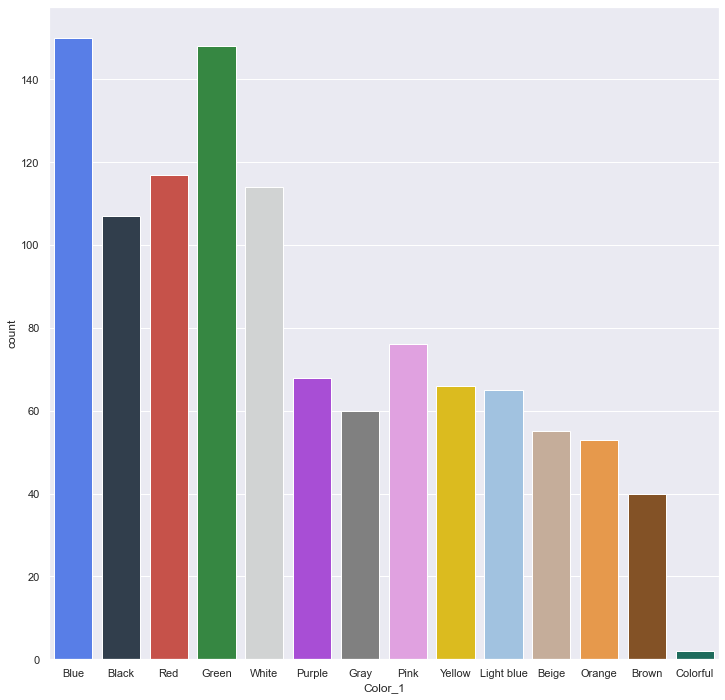

In [67]:
#Create Graph showing dominant colors
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_1', data=top, palette=ClothesColors)


In [68]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPHS
# Create an array with the colors you want to use
ClothesColors = ["#D0D3D4","#4073FF", "#2C3E50", "#DB4035", "#299438", "#FAD000","#AF38EB","#96C3EB","#EB96EB", 
                "#CCAC93", "#808080", "#FF9933", "#935116", "#117864"]

# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_2', ylabel='count'>

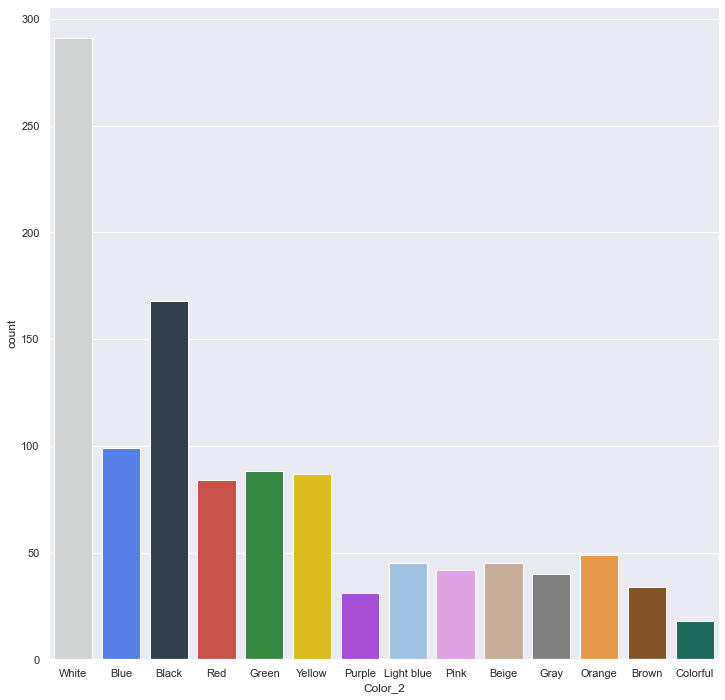

In [69]:
# Create a graph showing secondary colors
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_2', data=top, palette=ClothesColors)

#### Bottoms

In [70]:
#Replace space in column name with "_"
bottom.columns = bottom.columns.str.replace(' ','_')

In [71]:
#Find the different colors used
colors = bottom.Color_1.unique()
print(colors)

colors2 = bottom.Color_2.unique()
print(colors2)

['Blue' 'Black' 'Yellow' 'Gray' 'White' 'Red' 'Green' 'Purple' 'Orange'
 'Light blue' 'Brown' 'Beige' 'Pink' 'Colorful']
['Blue' 'Black' 'Purple' 'Light blue' 'Beige' 'White' 'Yellow' 'Orange'
 'Red' 'Green' 'Brown' 'Pink' 'Gray' 'Colorful']


In [72]:
# Create a dataframe of colors present in the dataset to keep a count of how frequently colors appear in the data
bottomcolor1 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
bottomcolor2 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})

In [73]:
# keep count of different colors as the main color in bottoms
for i in range(len(bottom)):
    if bottom["Color_1"][i] == "Blue":
        bottomcolor1["total"][0] += 1
    elif bottom["Color_1"][i] == "Black":
        bottomcolor1["total"][1] += 1
    elif bottom["Color_1"][i] == "Red":
        bottomcolor1["total"][2] += 1 
    elif bottom["Color_1"][i] == "Green":
        bottomcolor1["total"][3] += 1 
    elif bottom["Color_1"][i] == "White":
        bottomcolor1["total"][4] += 1
    elif bottom["Color_1"][i] == "Purple":
        bottomcolor1["total"][5] += 1
    elif bottom["Color_1"][i] == "Gray":
        bottomcolor1["total"][6] += 1
    elif bottom["Color_1"][i] == "Pink":
        bottomcolor1["total"][7] += 1
    elif bottom["Color_1"][i] == "Yellow":
        bottomcolor1["total"][8] += 1
    elif bottom["Color_1"][i] == "Light blue":
        bottomcolor1["total"][9] += 1
    elif bottom["Color_1"][i] == "Beige":
        bottomcolor1["total"][10] += 1 
    elif bottom["Color_1"][i] == "Orange":
        bottomcolor1["total"][11] += 1
    elif bottom["Color_1"][i] == "Brown":
        bottomcolor1["total"][12] += 1
    elif bottom["Color_1"][i] == "Colorful":
        bottomcolor1["total"][13] += 1
        
# keep count of different colors as the secondary color in bottoms
for i in range(len(bottom)):
    if bottom["Color_2"][i] == "Blue":
        bottomcolor2["total"][0] += 1
    elif bottom["Color_2"][i] == "Black":
        bottomcolor2["total"][1] += 1
    elif bottom["Color_2"][i] == "Red":
        bottomcolor2["total"][2] += 1 
    elif bottom["Color_2"][i] == "Green":
        bottomcolor2["total"][3] += 1 
    elif bottom["Color_2"][i] == "White":
        bottomcolor2["total"][4] += 1
    elif bottom["Color_2"][i] == "Purple":
        bottomcolor2["total"][5] += 1
    elif bottom["Color_2"][i] == "Gray":
        bottomcolor2["total"][6] += 1
    elif bottom["Color_2"][i] == "Pink":
        bottomcolor2["total"][7] += 1
    elif bottom["Color_2"][i] == "Yellow":
        bottomcolor2["total"][8] += 1
    elif bottom["Color_2"][i] == "Light blue":
        bottomcolor2["total"][9] += 1 
    elif bottom["Color_2"][i] == "Beige":
        bottomcolor2["total"][10] += 1 
    elif bottom["Color_2"][i] == "Orange":
        bottomcolor2["total"][11] += 1
    elif bottom["Color_2"][i] == "Brown":
        bottomcolor2["total"][12] += 1
    elif bottom["Color_2"][i] == "Colorful":
        bottomcolor2["total"][13] += 1 

<ipython-input-73-7176156d9ff4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottomcolor1["total"][0] += 1
<ipython-input-73-7176156d9ff4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottomcolor1["total"][1] += 1
<ipython-input-73-7176156d9ff4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottomcolor1["total"][8] += 1
<ipython-input-73-7176156d9ff4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [74]:
print(bottomcolor1)
print("")
print(bottomcolor2)
print("")
print("The total amount of bottoms is", len(bottom))

        colors  total
0         Blue    106
1        Black     71
2          Red     76
3        Green     98
4        White     39
5       Purple     45
6         Gray     33
7         Pink     59
8       Yellow     44
9   Light blue     54
10       Beige     29
11      Orange     39
12       Brown     32
13    Colorful      1

        colors  total
0         Blue     78
1        Black     95
2          Red     43
3        Green     70
4        White    100
5       Purple     31
6         Gray     29
7         Pink     48
8       Yellow     63
9   Light blue     46
10       Beige     36
11      Orange     34
12       Brown     46
13    Colorful      7

The total amount of bottoms is 726


In [75]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPH
# Create an array with the colors you want to use
ClothesColors = ["#4073FF", "#2C3E50", "#FAD000","#808080", "#D0D3D4","#DB4035", "#299438","#AF38EB", "#FF9933", "#96C3EB", "#935116", "#CCAC93","#EB96EB","#117864"]


# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_1', ylabel='count'>

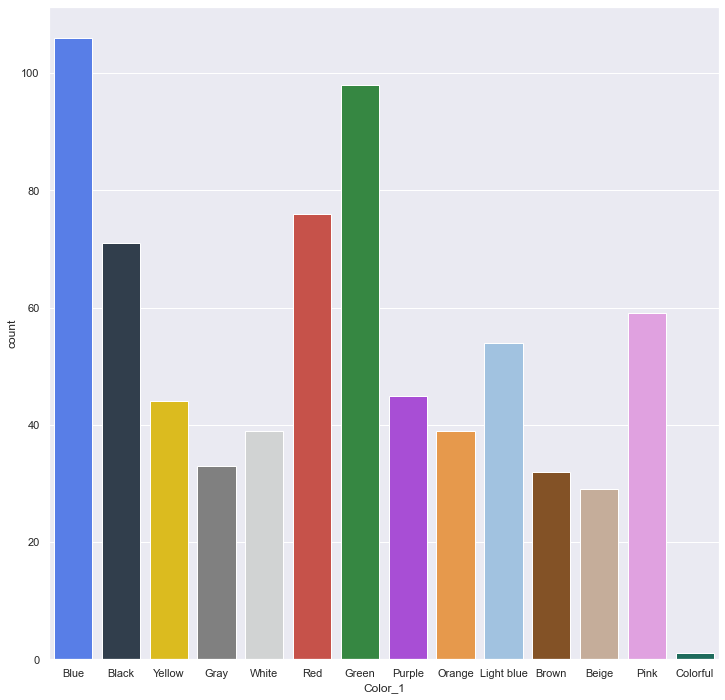

In [76]:
#Create Graph
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_1', data=bottom, palette=ClothesColors)

In [77]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPH
# Create an array with the colors you want to use
ClothesColors = ["#4073FF", "#2C3E50", "#AF38EB", "#96C3EB", "#CCAC93", "#D0D3D4", "#FAD000", "#FF9933", "#DB4035","#299438","#935116", "#EB96EB","#808080","#117864"]


# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_2', ylabel='count'>

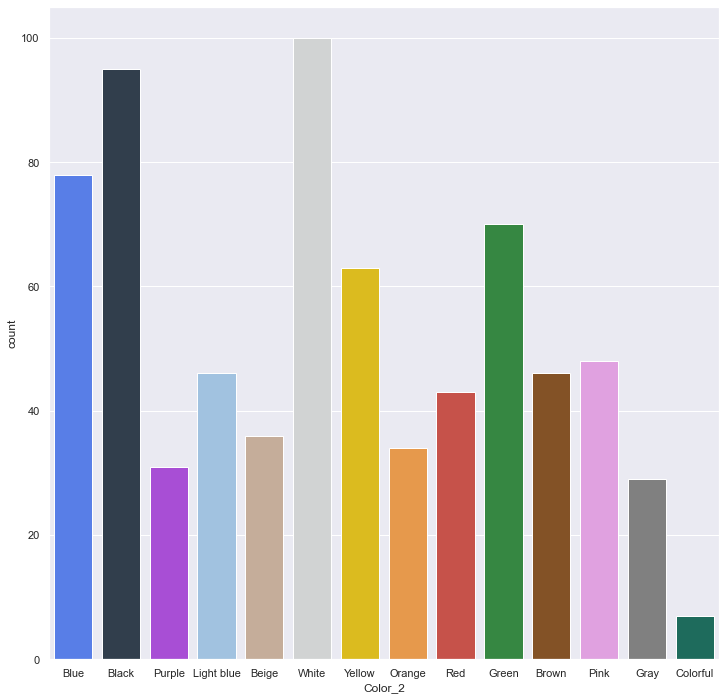

In [78]:
#Create Graph
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_2', data=bottom, palette=ClothesColors)

#### Shoes

In [79]:
#Replace space in column name with "_"
shoe.columns = shoe.columns.str.replace(' ','_')

In [80]:
#Find the different colors used
colors = shoe.Color_1.unique()
print(colors)

colors2 = shoe.Color_2.unique()
print(colors2)

['Brown' 'Black' 'Beige' 'Gray' 'Light blue' 'Orange' 'Pink' 'Yellow'
 'Purple' 'Green' 'Red' 'Blue' 'White']
['Brown' 'Black' 'Beige' 'Gray' 'White' 'Yellow' 'Pink' 'Light blue'
 'Blue' 'Purple' 'Orange' 'Colorful' 'Green' 'Red']


In [81]:
shoecolor1 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
shoecolor2 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})

In [82]:
# keep count of different colors as the main color in shoes
for i in range(len(shoe)):
    if shoe["Color_1"][i] == "Blue":
        shoecolor1["total"][0] += 1
    elif shoe["Color_1"][i] == "Black":
        shoecolor1["total"][1] += 1
    elif shoe["Color_1"][i] == "Red":
        shoecolor1["total"][2] += 1 
    elif shoe["Color_1"][i] == "Green":
        shoecolor1["total"][3] += 1 
    elif shoe["Color_1"][i] == "White":
        shoecolor1["total"][4] += 1
    elif shoe["Color_1"][i] == "Purple":
        shoecolor1["total"][5] += 1
    elif shoe["Color_1"][i] == "Gray":
        shoecolor1["total"][6] += 1
    elif shoe["Color_1"][i] == "Pink":
        shoecolor1["total"][7] += 1
    elif shoe["Color_1"][i] == "Yellow":
        shoecolor1["total"][8] += 1
    elif shoe["Color_1"][i] == "Light blue":
        shoecolor1["total"][9] += 1
    elif shoe["Color_1"][i] == "Beige":
        shoecolor1["total"][10] += 1 
    elif shoe["Color_1"][i] == "Orange":
        shoecolor1["total"][11] += 1
    elif shoe["Color_1"][i] == "Brown":
        shoecolor1["total"][12] += 1
    elif shoe["Color_1"][i] == "Colorful":
        shoecolor1["total"][13] += 1
        
# keep count of different colors as the secondary color in shoes
for i in range(len(shoe)):
    if shoe["Color_2"][i] == "Blue":
        shoecolor2["total"][0] += 1
    elif shoe["Color_2"][i] == "Black":
        shoecolor2["total"][1] += 1
    elif shoe["Color_2"][i] == "Red":
        shoecolor2["total"][2] += 1 
    elif shoe["Color_2"][i] == "Green":
        shoecolor2["total"][3] += 1 
    elif shoe["Color_2"][i] == "White":
        shoecolor2["total"][4] += 1
    elif shoe["Color_2"][i] == "Purple":
        shoecolor2["total"][5] += 1
    elif shoe["Color_2"][i] == "Gray":
        shoecolor2["total"][6] += 1
    elif shoe["Color_2"][i] == "Pink":
        shoecolor2["total"][7] += 1
    elif shoe["Color_2"][i] == "Yellow":
        shoecolor2["total"][8] += 1
    elif shoe["Color_2"][i] == "Light blue":
        shoecolor2["total"][9] += 1 
    elif shoe["Color_2"][i] == "Beige":
        shoecolor2["total"][10] += 1 
    elif shoe["Color_2"][i] == "Orange":
        shoecolor2["total"][11] += 1
    elif shoe["Color_2"][i] == "Brown":
        shoecolor2["total"][12] += 1
    elif shoe["Color_2"][i] == "Colorful":
        shoecolor2["total"][13] += 1 

<ipython-input-82-40e981c46446>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoecolor1["total"][12] += 1
<ipython-input-82-40e981c46446>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoecolor1["total"][1] += 1
<ipython-input-82-40e981c46446>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shoecolor1["total"][10] += 1
<ipython-input-82-40e981c46446>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [83]:
print(shoecolor1)
print("")
print(shoecolor2)
print("")
print("The total amount of shoes is", len(shoe))

        colors  total
0         Blue     48
1        Black     50
2          Red     56
3        Green     47
4        White     33
5       Purple     30
6         Gray     20
7         Pink     41
8       Yellow     45
9   Light blue     28
10       Beige     17
11      Orange     18
12       Brown     21
13    Colorful      0

        colors  total
0         Blue     22
1        Black    101
2          Red     24
3        Green     22
4        White     98
5       Purple     15
6         Gray     27
7         Pink     25
8       Yellow     21
9   Light blue     13
10       Beige     42
11      Orange      9
12       Brown     29
13    Colorful      6

The total amount of shoes is 454


In [84]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPH
# Create an array with the colors you want to use
ClothesColors = ["#935116","#2C3E50","#CCAC93","#808080","#96C3EB","#FF9933","#EB96EB","#FAD000","#AF38EB","#299438","#DB4035","#4073FF","#D0D3D4"]


# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_1', ylabel='count'>

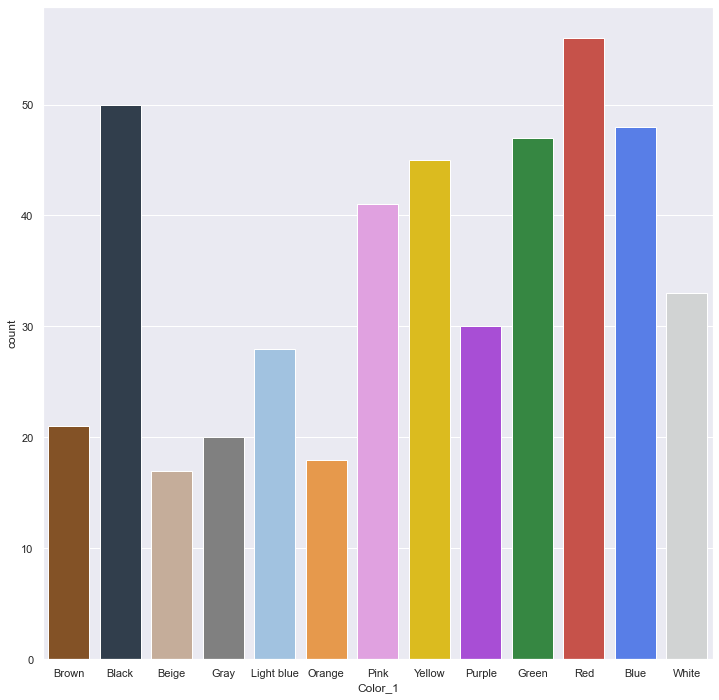

In [85]:
#Create Graph
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_1', data=shoe, palette=ClothesColors)

In [86]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPH
# Create an array with the colors you want to use
ClothesColors = ["#935116","#2C3E50","#CCAC93","#808080", "#D0D3D4", "#FAD000","#EB96EB","#96C3EB","#4073FF", "#AF38EB","#FF9933","#117864", "#299438","#DB4035"]

# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_2', ylabel='count'>

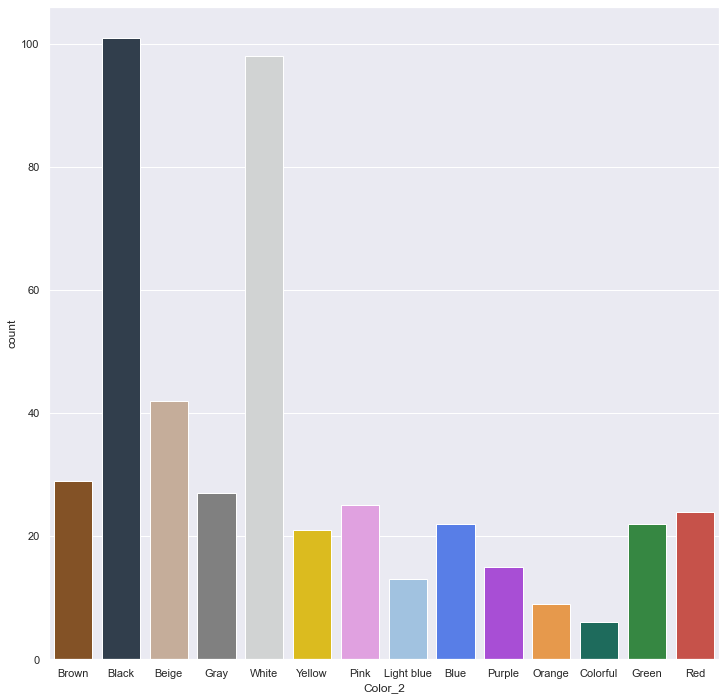

In [87]:
#Create Graph
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_2', data=shoe, palette=ClothesColors)

#### Headgear

In [88]:
#Replace space in column name with "_"
hat.columns = hat.columns.str.replace(' ','_')

In [89]:
#Find the different colors used
colors = hat.Color_1.unique()
print(colors)

colors2 = hat.Color_2.unique()
print(colors2)

['Brown' 'Yellow' 'Green' 'Red' 'Blue' 'Beige' 'Black' 'White'
 'Light blue' 'Pink' 'Orange' 'Colorful' 'Gray' 'Purple']
['Brown' 'Yellow' 'Green' 'Red' 'Blue' 'Beige' 'Light blue' 'Pink' 'Black'
 'White' 'Colorful' 'Purple' 'Orange' 'Gray']


In [90]:
hatscolor1 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})
hatscolor2 = pd.DataFrame({'colors': ['Blue', 'Black', 'Red', 'Green', 'White', 'Purple', 'Gray', 'Pink', 'Yellow','Light blue','Beige', 'Orange', 'Brown', 'Colorful'], 'total': [0,0,0,0,0,0,0,0,0,0,0,0,0,0]})

In [91]:
# keep count of different colors as the main color in shoes
for i in range(len(hat)):
    if hat["Color_1"][i] == "Blue":
        hatscolor1["total"][0] += 1
    elif hat["Color_1"][i] == "Black":
        hatscolor1["total"][1] += 1
    elif hat["Color_1"][i] == "Red":
        hatscolor1["total"][2] += 1 
    elif hat["Color_1"][i] == "Green":
        hatscolor1["total"][3] += 1 
    elif hat["Color_1"][i] == "White":
        hatscolor1["total"][4] += 1
    elif hat["Color_1"][i] == "Purple":
        hatscolor1["total"][5] += 1
    elif hat["Color_1"][i] == "Gray":
        hatscolor1["total"][6] += 1
    elif hat["Color_1"][i] == "Pink":
        hatscolor1["total"][7] += 1
    elif hat["Color_1"][i] == "Yellow":
        hatscolor1["total"][8] += 1
    elif hat["Color_1"][i] == "Light blue":
        hatscolor1["total"][9] += 1
    elif hat["Color_1"][i] == "Beige":
        hatscolor1["total"][10] += 1 
    elif hat["Color_1"][i] == "Orange":
        hatscolor1["total"][11] += 1
    elif hat["Color_1"][i] == "Brown":
        hatscolor1["total"][12] += 1
    elif hat["Color_1"][i] == "Colorful":
        hatscolor1["total"][13] += 1
        
# keep count of different colors as the secondary color in shoes
for i in range(len(hat)):
    if hat["Color_2"][i] == "Blue":
        hatscolor2["total"][0] += 1
    elif hat["Color_2"][i] == "Black":
        hatscolor2["total"][1] += 1
    elif hat["Color_2"][i] == "Red":
        hatscolor2["total"][2] += 1 
    elif hat["Color_2"][i] == "Green":
        hatscolor2["total"][3] += 1 
    elif hat["Color_2"][i] == "White":
        hatscolor2["total"][4] += 1
    elif hat["Color_2"][i] == "Purple":
        hatscolor2["total"][5] += 1
    elif hat["Color_2"][i] == "Gray":
        hatscolor2["total"][6] += 1
    elif hat["Color_2"][i] == "Pink":
        hatscolor2["total"][7] += 1
    elif hat["Color_2"][i] == "Yellow":
        hatscolor2["total"][8] += 1
    elif hat["Color_2"][i] == "Light blue":
        hatscolor2["total"][9] += 1 
    elif hat["Color_2"][i] == "Beige":
        hatscolor2["total"][10] += 1 
    elif hat["Color_2"][i] == "Orange":
        hatscolor2["total"][11] += 1
    elif hat["Color_2"][i] == "Brown":
        hatscolor2["total"][12] += 1
    elif hat["Color_2"][i] == "Colorful":
        hatscolor2["total"][13] += 1 

<ipython-input-91-24df37e15a58>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hatscolor1["total"][12] += 1
<ipython-input-91-24df37e15a58>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hatscolor1["total"][8] += 1
<ipython-input-91-24df37e15a58>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hatscolor1["total"][3] += 1
<ipython-input-91-24df37e15a58>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [92]:
print(hatscolor1)
print("")
print(hatscolor2)
print("")
print("The total amount of hats is", len(hat))

        colors  total
0         Blue     81
1        Black     64
2          Red     91
3        Green     84
4        White     59
5       Purple     44
6         Gray     22
7         Pink     61
8       Yellow     54
9   Light blue     32
10       Beige     34
11      Orange     34
12       Brown     25
13    Colorful     13

        colors  total
0         Blue     43
1        Black     96
2          Red     48
3        Green     60
4        White    109
5       Purple     20
6         Gray     42
7         Pink     31
8       Yellow     97
9   Light blue     30
10       Beige     20
11      Orange     26
12       Brown     24
13    Colorful     52

The total amount of hats is 698


In [93]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPH
# Create an array with the colors you want to use
ClothesColors = ["#935116","#FAD000","#299438","#DB4035","#4073FF","#CCAC93","#2C3E50","#D0D3D4","#96C3EB","#EB96EB", "#FF9933","#117864","#808080", "#AF38EB"]

# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_1', ylabel='count'>

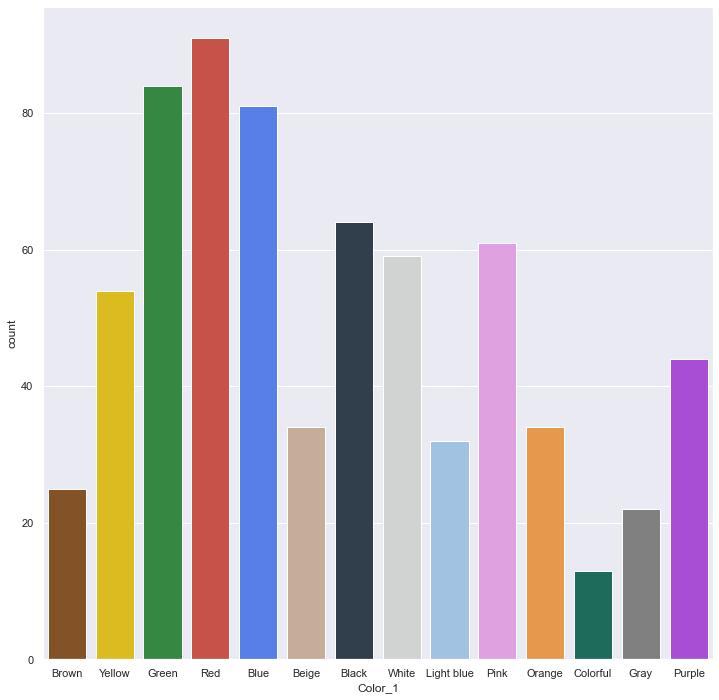

In [94]:
#Create Graph
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_1', data=hat, palette=ClothesColors)

In [95]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT GRAPH
# Create an array with the colors you want to use
ClothesColors = ["#935116","#FAD000","#299438", "#DB4035","#4073FF","#CCAC93","#96C3EB","#EB96EB","#2C3E50","#D0D3D4", "#117864","#AF38EB","#FF9933","#808080"]

# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Color_2', ylabel='count'>

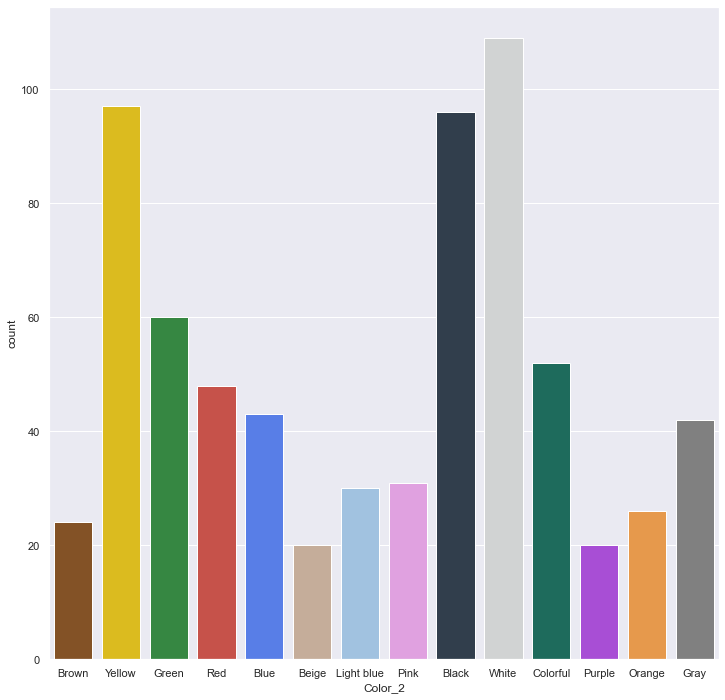

In [96]:
#Create Graph
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,12)})
sns.countplot(x = 'Color_2', data=hat, palette=ClothesColors)

### Seasonal Clothes Analyses

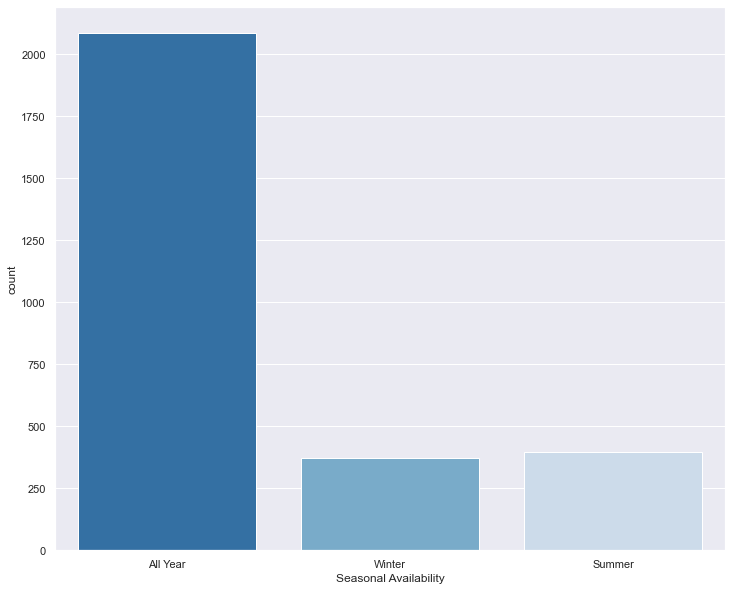

In [97]:
# How many clothes of all variations are seasonal? Represent this question visually
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x='Seasonal Availability', data=cDat, palette="Blues_r")

plt.show()

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html
### COLOR CITATION: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
### WHITEGRID CITATION: Dr. Scott Siepel, Data 1500

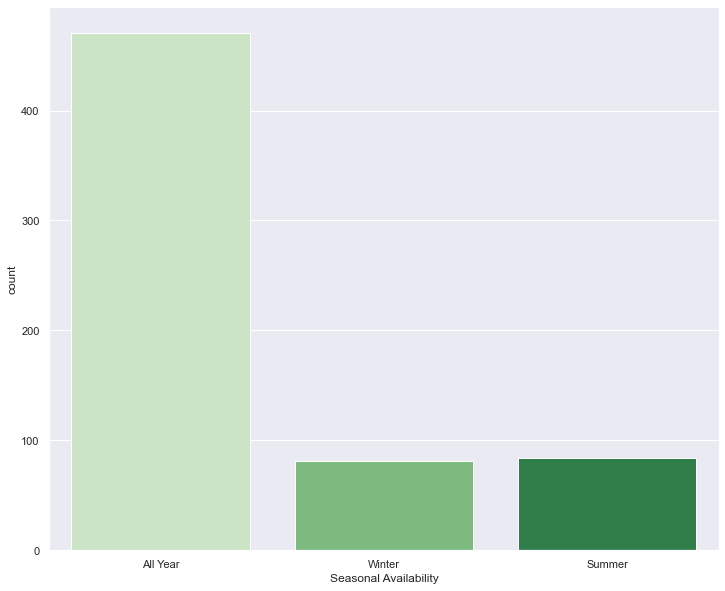

In [98]:
# How many single clothing items are seasonal? Represent this question visually
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x='Seasonal Availability', data=itemDat, palette="Greens") # Change to item dataset

plt.show()

# This one will be more informative for our presentation, since counting variations is somewhat misleading.

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html
### COLOR CITATION: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
### WHITEGRID CITATION: Dr. Scott Siepel, Data 1500

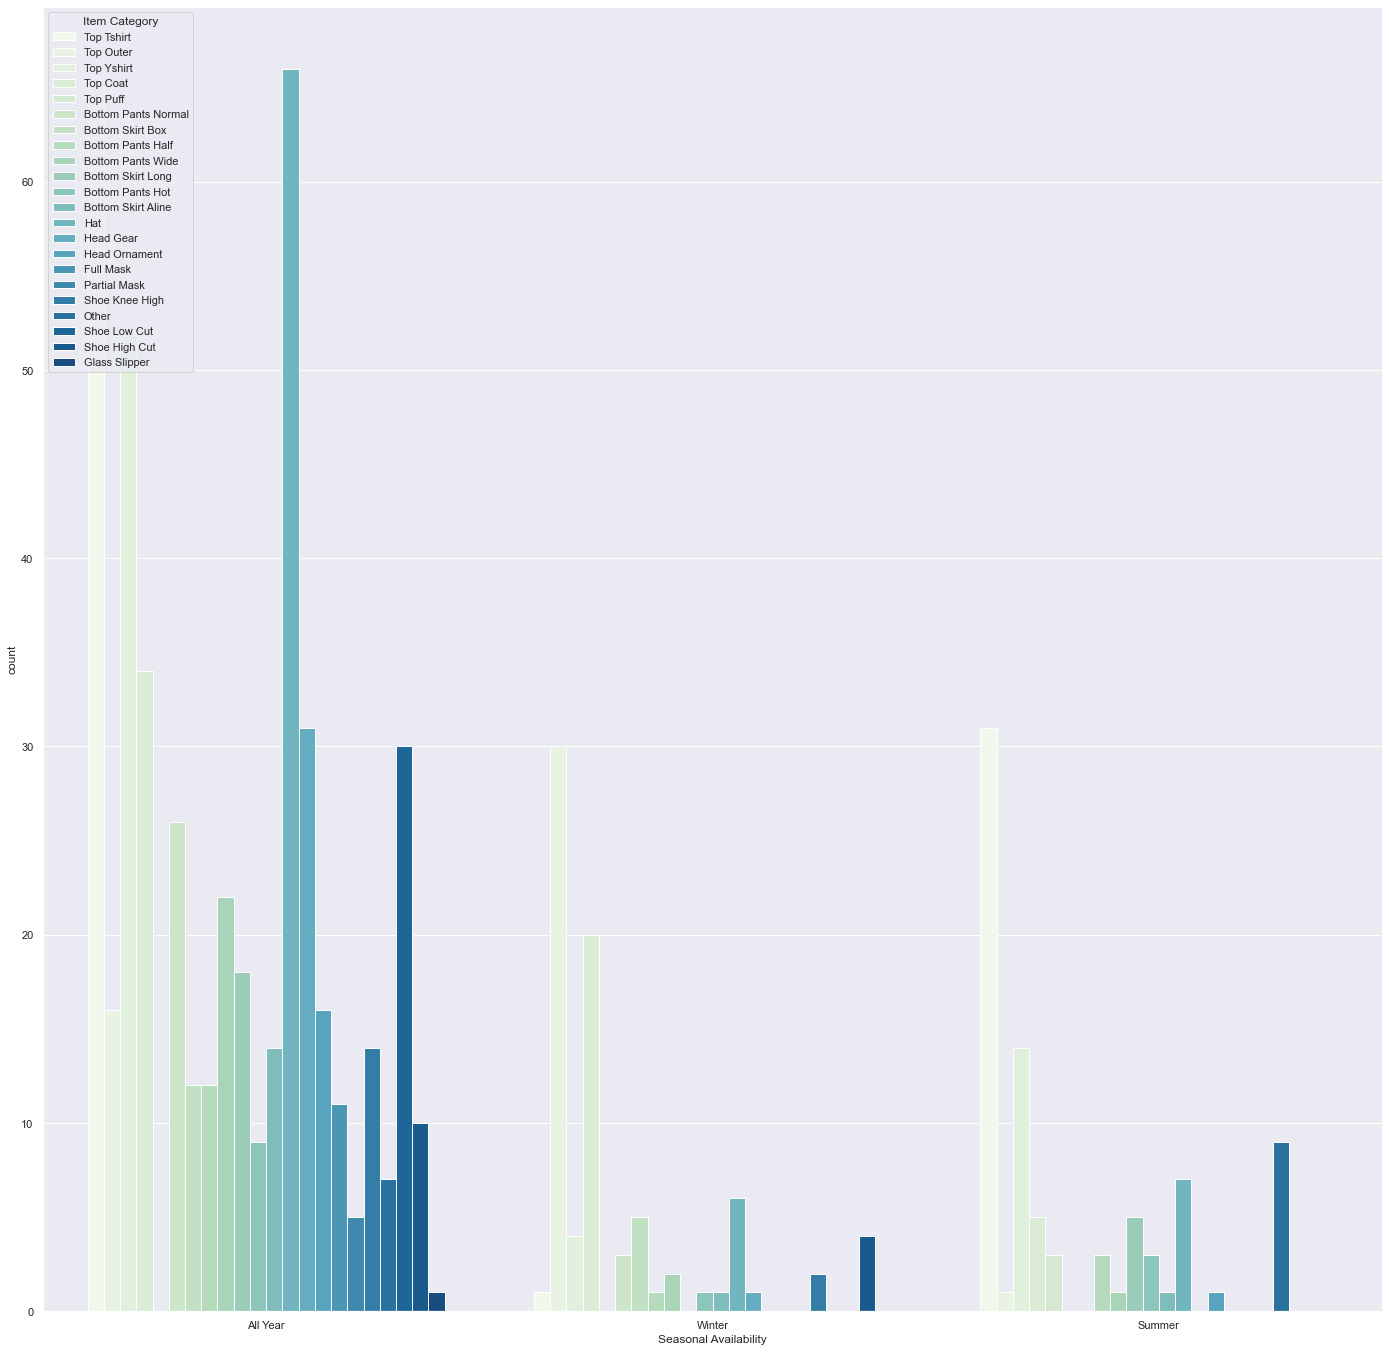

In [99]:
# How many single clothing items are seasonal by item type?
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(24,24)})
sns.countplot(x='Seasonal Availability', data=itemDat, hue = "Item Category", palette="GnBu") # Change to item dataset

plt.show()

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html
### COLOR CITATION: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
### WHITEGRID CITATION: Dr. Scott Siepel, Data 1500

This graph is a bit difficult to read, and would not be presented in an analysis. However, this prelimanary exploration revealse that tops seem to be the most common seasonal item. Thus, taking a closer look at tops throughout seasonal analyses would make sense.

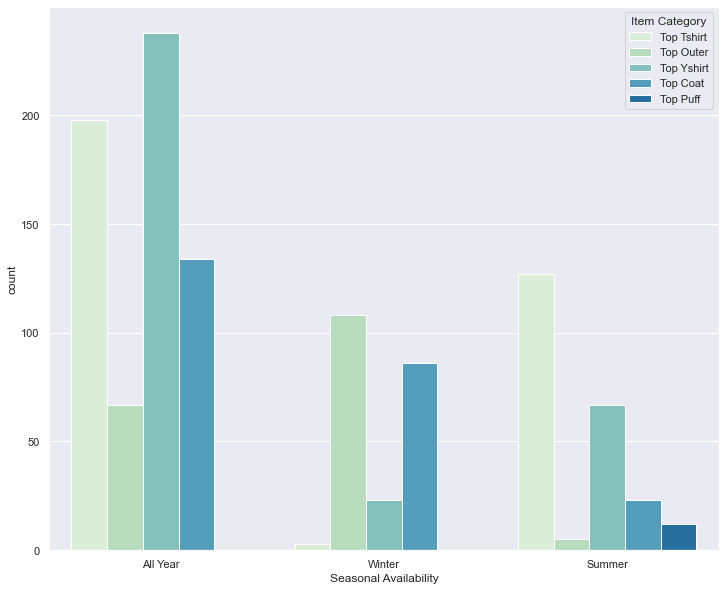

In [100]:
# Taking a closer look: how many tops are seasonal by item type?
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x='Seasonal Availability', data=tops, hue = "Item Category", palette="GnBu") # Change to tops dataset

plt.show()

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html
### COLOR CITATION: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
### WHITEGRID CITATION: Dr. Scott Siepel, Data 1500

It seems that outer garments and coats are more present in winter while t-shirts are not. This makes sense seasonally. Similarly, t-shirts are the most common summer seasonal items, while outer clothes are the least common.

<AxesSubplot:xlabel='Seasonal Availability', ylabel='Buy'>

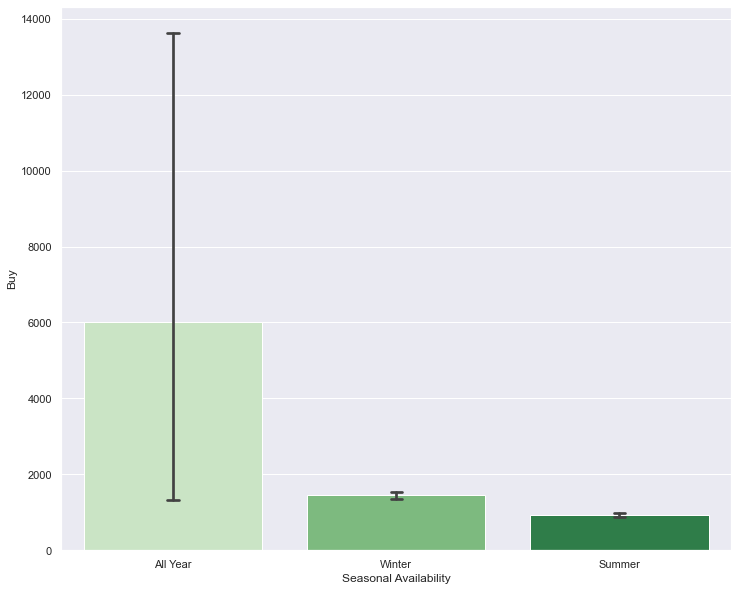

In [101]:
# What are the average prices across seasons for all clothes?
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='Seasonal Availability', y ='Buy', data=itemDat, capsize=.05, palette="Greens")

### CITATION: https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='Seasonal Availability', ylabel='Sell'>

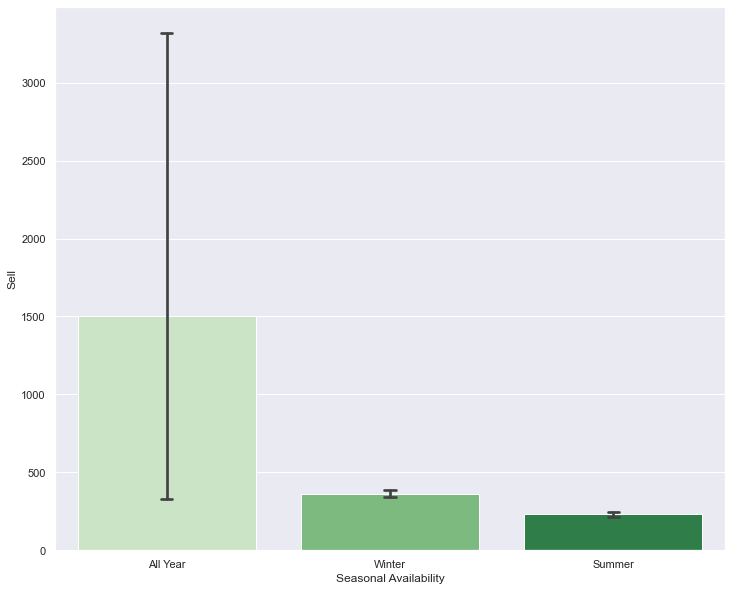

In [102]:
# What are the average resale prices across seasons for all clothes?
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='Seasonal Availability', y ='Sell', data=itemDat, capsize=.05, palette="Greens")

### CITATION: https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='Seasonal Availability', ylabel='Buy'>

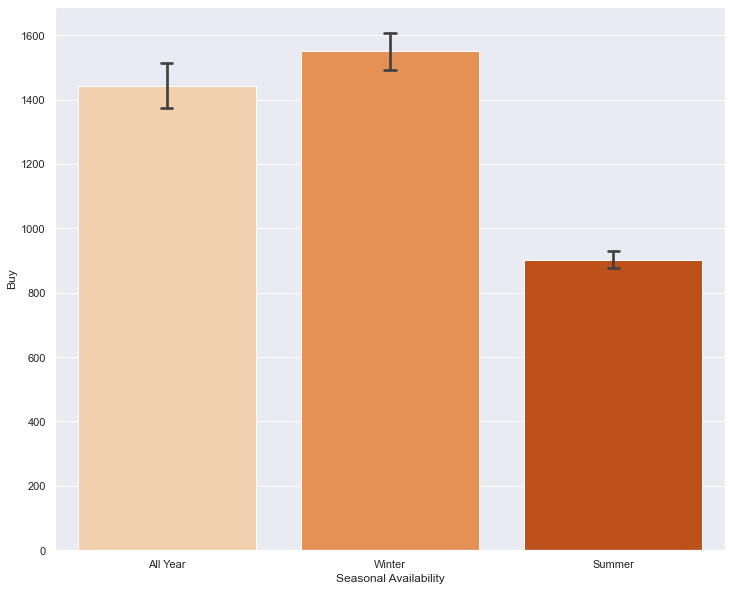

In [103]:
# What are the average prices across seasons for tops?
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='Seasonal Availability', y ='Buy', data=tops, capsize=.05, palette="Oranges")

### CITATION: https://seaborn.pydata.org/generated/seaborn.barplot.html

<AxesSubplot:xlabel='Seasonal Availability', ylabel='Sell'>

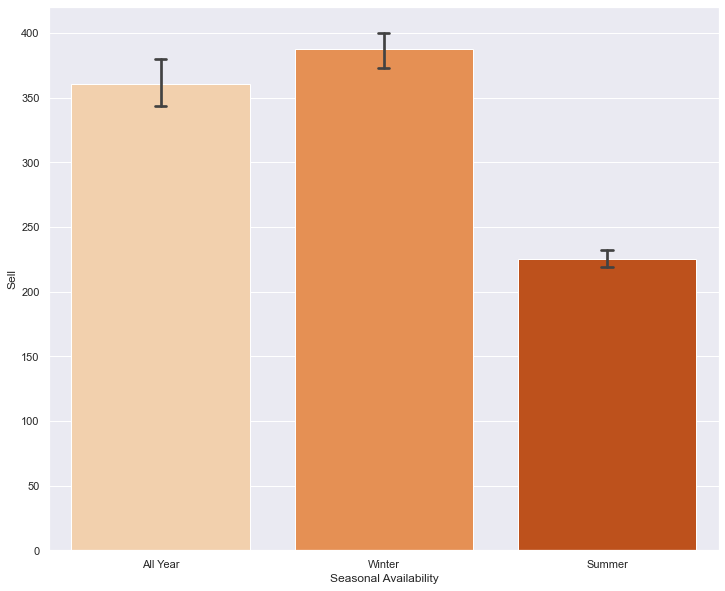

In [104]:
# What are the average resale prices across seasons for tops?
sns.set(rc={'figure.figsize':(12,10)})
sns.barplot(x='Seasonal Availability', y ='Sell', data=tops, capsize=.05, palette="Oranges") # use Tops dataset

### CITATION: https://seaborn.pydata.org/generated/seaborn.barplot.html

In [105]:
# CREATE A CUSTOM COLOR PALETTE FOR THE NEXT FEW GRAPHS
# Create an array with the colors you want to use
ClothesColors = ["#4073FF", "#2C3E50", "#DB4035", "#299438", "#D0D3D4", "#AF38EB", "#808080", "#EB96EB", "#FAD000",
                "#96C3EB", "#CCAC93", "#FF9933", "#935116", "#117864"]
# Blue, Black, Red, Green, White, Purple, Gray, Pink, Yellow
# Light Blue, Beige, Orange, Brown, Blue-Green (for colorful)

# Set your custom color palette
sns.set_palette(sns.color_palette(ClothesColors))

<AxesSubplot:xlabel='Seasonal Availability', ylabel='count'>

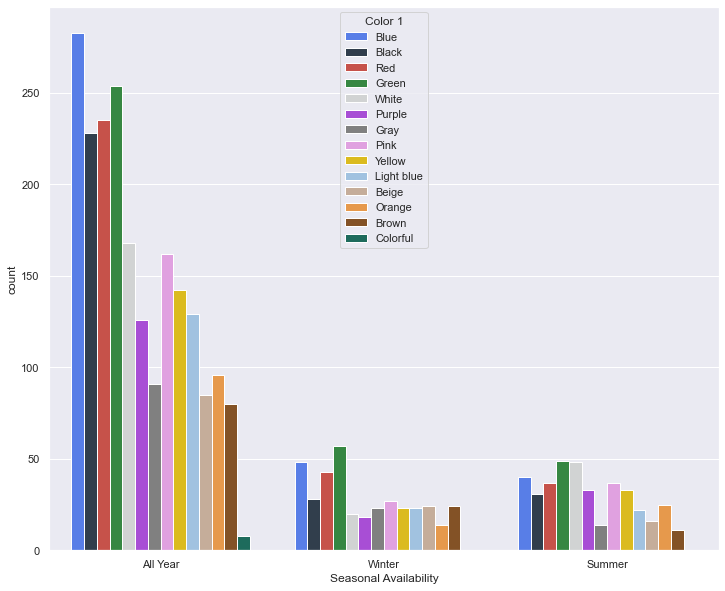

In [106]:
# What are the dominant colors across seasons for all clothes?
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x='Seasonal Availability', data=cDat, hue = "Color 1", palette=ClothesColors)

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html
### COLOR CITATION: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
### WHITEGRID CITATION: Dr. Scott Siepel, Data 1500

<AxesSubplot:xlabel='Seasonal Availability', ylabel='count'>

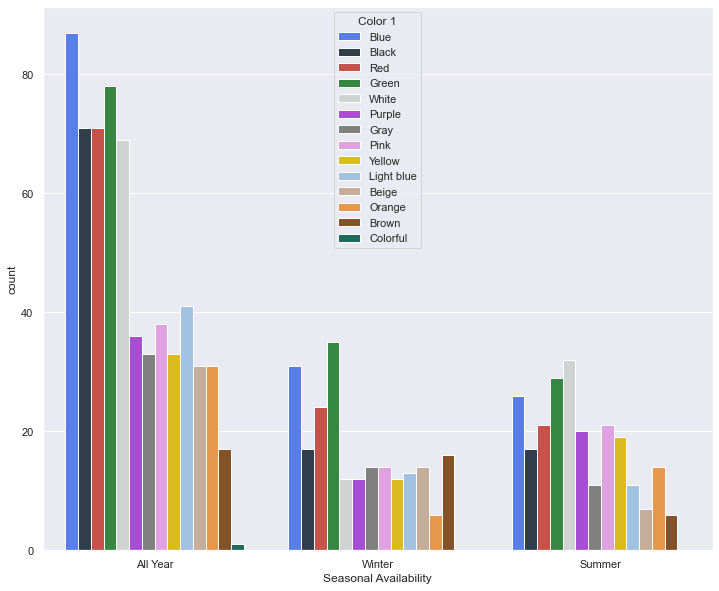

In [107]:
# What are the dominant colors across seasons for tops?
sns.set_theme(style="whitegrid") # from Data Science 1500
sns.set(rc={'figure.figsize':(12,10)})
sns.countplot(x='Seasonal Availability', data=tops, hue = "Color 1", palette=ClothesColors) # Change to tops dataset

### CITATION: https://seaborn.pydata.org/generated/seaborn.countplot.html
### COLOR CITATION: https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f
### WHITEGRID CITATION: Dr. Scott Siepel, Data 1500

### Our work has shed some light on clothing prices, resale value, and colors in Animal Crossing New Horizons.
#### Based on this work, we have a few suggestions for Nintendo.

Color suggestions:
Use secondary colors other than Black and White, and make more Colorful items overall

Price Suggestions:
Change from ubiquitous 25% resale price to more varied model, and give players higher sell prices for their items if they sell old items sooner to buy new items

Seasonal Considerations: Create more seasonal items that aren’t tops. Also, seasonal items would be more exclusive with higher prices/resale values. Also, make the dominant color (Green) different for overall seasonal clothes.